Titanic Classification :
Make a system which tells whether the person will be
save from sinking. What factors were
most likely lead to success-socio-economic
status, age, gender and more.

In [3]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

We're starting by bringing in the data files. We'll focus on the Training set for our analysis and validation. Later, we'll use the Test set to make our final predictions. This helps us make sure our predictions work well on new data.

In [4]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

train_df['train_test'] = 1
test_df['train_test'] = 0
# test_df['Survived'] = np.NaN
all_data = pd.concat([train_df,test_df])

%matplotlib inline
all_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')

In [5]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1


In [6]:
test_df.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,0
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,0
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,0
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,0


Exploratory Data Analysis (EDA) is like investigating data to find patterns, unusual things, test ideas, and make sure our assumptions are right. We do this by looking at numbers and pictures that give us a quick overview of the data. simply, EDA helps us understand what's in our data by using graphs and summaries to show the most important stuff. 

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


The training set contains 891 rows, which are like entries, and 11 features, which are pieces of information, plus the target variable (survived). Out of these features, 2 are numbers with decimals (floats), 5 are whole numbers (integers), and 5 are labels or categories (objects).


In [8]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


Exploring Missing Data

In [9]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(13)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
SibSp,0,0.0
Parch,0,0.0


The 'Embarked' feature is missing just 2 values, so we can easily decide whether to fill in those or remove them. However, the 'Age' feature is more challenging because it's missing 177 values. As for the 'Cabin' feature, it's more complicated; around 77% of it is missing, so it might be best to remove it from the dataset after taking a closer look.

In [10]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype=object)

Some features that could affect the chances of survival are 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', and 'Embarked'. It seems reasonable to think that 'PassengerId', 'Name', and 'Ticket' might not be strongly linked to survival rate. But, to be sure, we need to analyze the data and run tests.

Dealing with the Outlier

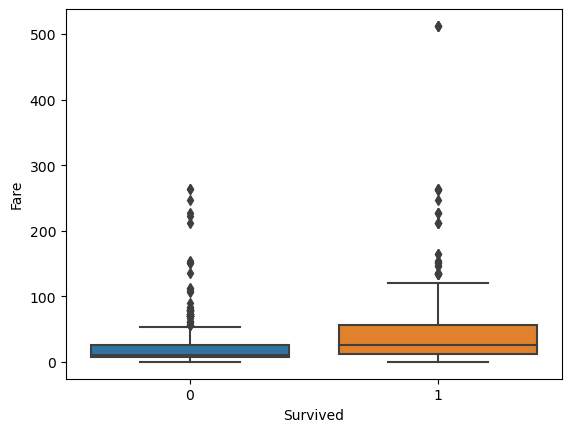

In [11]:
sns.boxplot(x='Survived',y='Fare',data=train_df);

Passengers who paid over 300

In [12]:
train_df[train_df['Fare']>300]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,1
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,1
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,1


Removing outliers could be helpful for improving the model's performance. However, it's important to investigate this further before making a decision.

In [13]:
# train_df = train_df[train_df['Fare']<300]

The saying "The captain goes down with the ship" is a tradition at sea. It means the captain is responsible for the ship and everyone on it. If there's a crisis, the captain will either rescue everyone or stay with the ship, even if it means sacrificing their own life.

In the Titanic's case, Captain Edward Gifford Crosby followed this tradition heroically, staying with the ship to help passengers, even though it led to his own loss.

In [14]:
train_df[train_df['Name'].str.contains("Capt")]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0,B22,S,1


Embarked, Pclass and Sex:

C:\Users\iredd\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95.0)` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\iredd\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95.0)` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\iredd\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95.0)` for the same effect.

  func(*plot_args, **plot_kwargs)


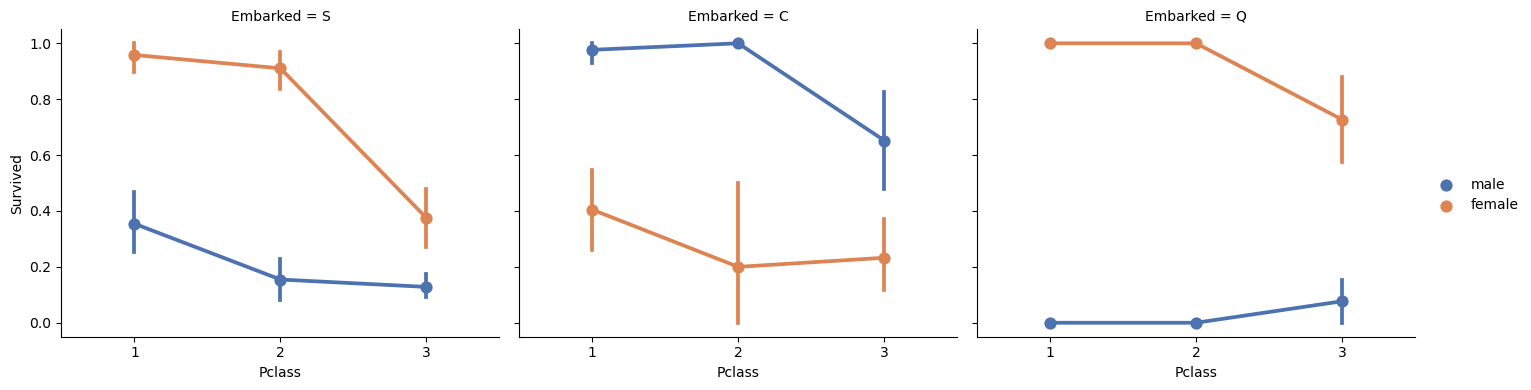

In [15]:
FacetGrid = sns.FacetGrid(train_df, col='Embarked', height=4, aspect=1.2)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', ci=95.0, palette='deep', order=None, hue_order=None)
FacetGrid.add_legend();

Distribution of Pclass and Survived

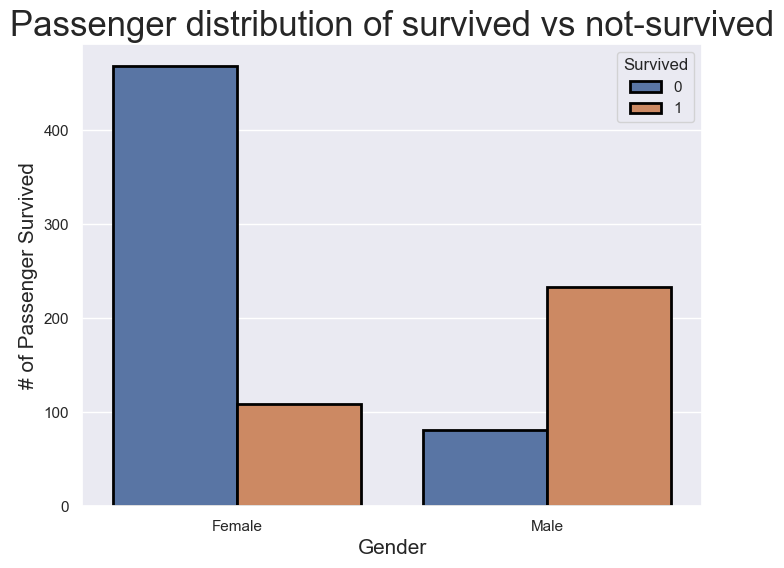

In [16]:
sns.set(style='darkgrid')
plt.subplots(figsize = (8,6))
ax=sns.countplot(x='Sex', data = train_df, hue='Survived', edgecolor=(0,0,0), linewidth=2)

# Fixing title, xlabel and ylabel
plt.title('Passenger distribution of survived vs not-survived', fontsize=25)
plt.xlabel('Gender', fontsize=15)
plt.ylabel("# of Passenger Survived", fontsize = 15)
labels = ['Female', 'Male']

# Fixing xticks.
plt.xticks(sorted(train_df.Survived.unique()),labels);

In [17]:
train_df.groupby(['Sex']).mean()

C:\Users\iredd\AppData\Local\Temp\ipykernel_23844\3313102057.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  train_df.groupby(['Sex']).mean()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
Sex,,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818,1.0
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893,1.0


As I mentioned earlier, women had a significantly higher chance of surviving compared to men. Around 74% of the women on board survived, whereas only about 18% of the men survived.

Looking deeper into differences between females and males statistics


In [18]:
train_df.groupby(['Sex','Pclass']).mean()

C:\Users\iredd\AppData\Local\Temp\ipykernel_23844\4204354171.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  train_df.groupby(['Sex','Pclass']).mean()


PassengerId  Survived        Age     SibSp     Parch  \
Sex    Pclass                                                         
female 1        469.212766  0.968085  34.611765  0.553191  0.457447   
       2        443.105263  0.921053  28.722973  0.486842  0.605263   
       3        399.729167  0.500000  21.750000  0.895833  0.798611   
male   1        455.729508  0.368852  41.281386  0.311475  0.278689   
       2        447.962963  0.157407  30.740707  0.342593  0.222222   
       3        455.515850  0.135447  26.507589  0.498559  0.224784   

                     Fare  train_test  
Sex    Pclass                          
female 1       106.125798         1.0  
       2        21.970121         1.0  
       3        16.118810         1.0  
male   1        67.226127         1.0  
       2        19.741782         1.0  
       3        12.661633         1.0

We're organizing passengers into groups based on their gender and ticket class (Pclass). It's important to observe the contrast in survival rates between men and women.

Women have a notably higher chance of surviving, particularly those in the first and second classes. The data also indicates that men in the first class are nearly three times more likely to survive than men in the third class.

Age and Sex distributions

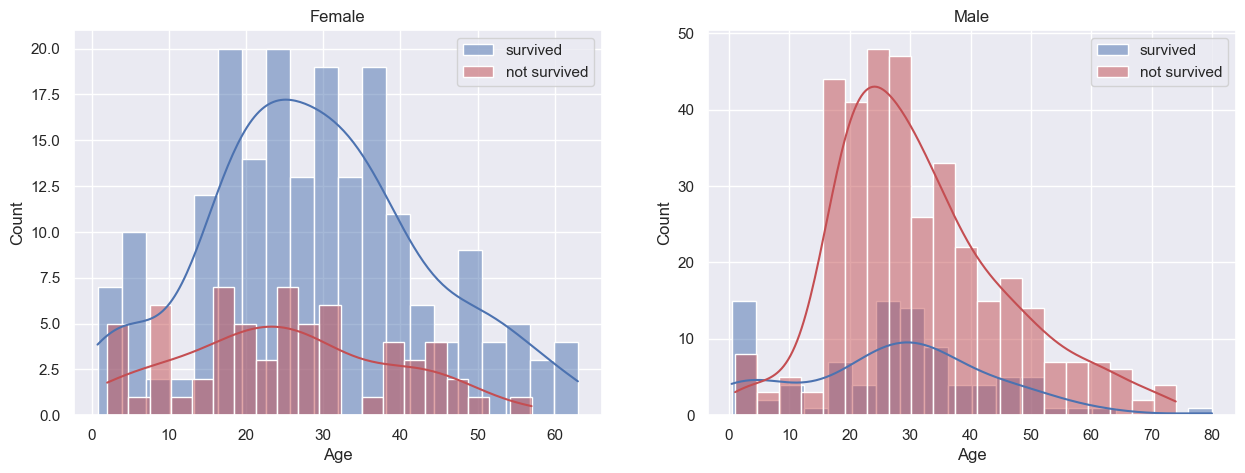

In [19]:
survived = 'survived'
not_survived = 'not survived'

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

women = train_df[train_df['Sex']=='female']
men = train_df[train_df['Sex']=='male']

# Plot Female Survived vs Not-Survived distribution
ax = sns.histplot(women[women['Survived']==1].Age.dropna(), bins=20, label = survived, ax = axes[0],color='b', kde=True)
ax = sns.histplot(women[women['Survived']==0].Age.dropna(), bins=20, label = not_survived, ax = axes[0],color='r', kde=True)
ax.legend()
ax.set_title('Female')

# Plot Male Survived vs Not-Survived distribution
ax = sns.histplot(men[men['Survived']==1].Age.dropna(), bins=20, label = survived, ax = axes[1],color='b', kde=True)
ax = sns.histplot(men[men['Survived']==0].Age.dropna(), bins=20, label = not_survived, ax = axes[1],color='r', kde=True)
ax.legend()
ax.set_title('Male');

It's evident that men have a better chance of survival when they're aged between 18 and 35. For women, the likelihood of survival is higher between 15 and 40 years old.

Interestingly, for men, the probability of survival is quite low between ages 5 and 18, as well as after 35. However, this pattern doesn't hold true for women. Additionally, it's worth noting that infants have a higher probability of survival across both genders.

Saving Children's First

In [20]:
train_df[train_df['Age']<18].groupby(['Sex','Pclass']).mean()

C:\Users\iredd\AppData\Local\Temp\ipykernel_23844\1113519119.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  train_df[train_df['Age']<18].groupby(['Sex','Pclass']).mean()


PassengerId  Survived        Age     SibSp     Parch  \
Sex    Pclass                                                         
female 1        525.375000  0.875000  14.125000  0.500000  0.875000   
       2        369.250000  1.000000   8.333333  0.583333  1.083333   
       3        374.942857  0.542857   8.428571  1.571429  1.057143   
male   1        526.500000  1.000000   8.230000  0.500000  2.000000   
       2        527.818182  0.818182   4.757273  0.727273  1.000000   
       3        437.953488  0.232558   9.963256  2.069767  1.000000   

                     Fare  train_test  
Sex    Pclass                          
female 1       104.083337         1.0  
       2        26.241667         1.0  
       3        18.727977         1.0  
male   1       116.072900         1.0  
       2        25.659473         1.0  
       3        22.752523         1.0

Children under 18 years old indeed have a greater likelihood of survival, possibly due to the practice of prioritizing the safety of children during emergencies.

Passenger class distribution; Survived vs Non-Survived


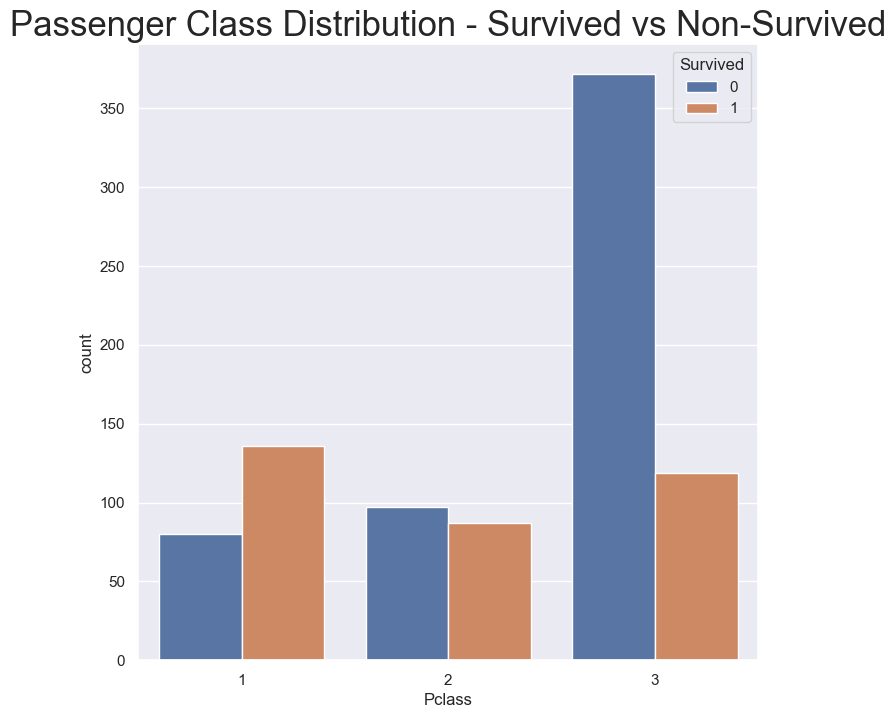

In [21]:
plt.subplots(figsize = (8,8))
ax=sns.countplot(x='Pclass',hue='Survived',data=train_df)
plt.title("Passenger Class Distribution - Survived vs Non-Survived", fontsize = 25);

C:\Users\iredd\AppData\Local\Temp\ipykernel_23844\942285626.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(train_df.loc[(train_df['Survived'] == 0),'Pclass'],shade=True,color='r',label='Not Survived')
C:\Users\iredd\AppData\Local\Temp\ipykernel_23844\942285626.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(train_df.loc[(train_df['Survived'] == 1),'Pclass'],shade=True,color='b',label='Survived')


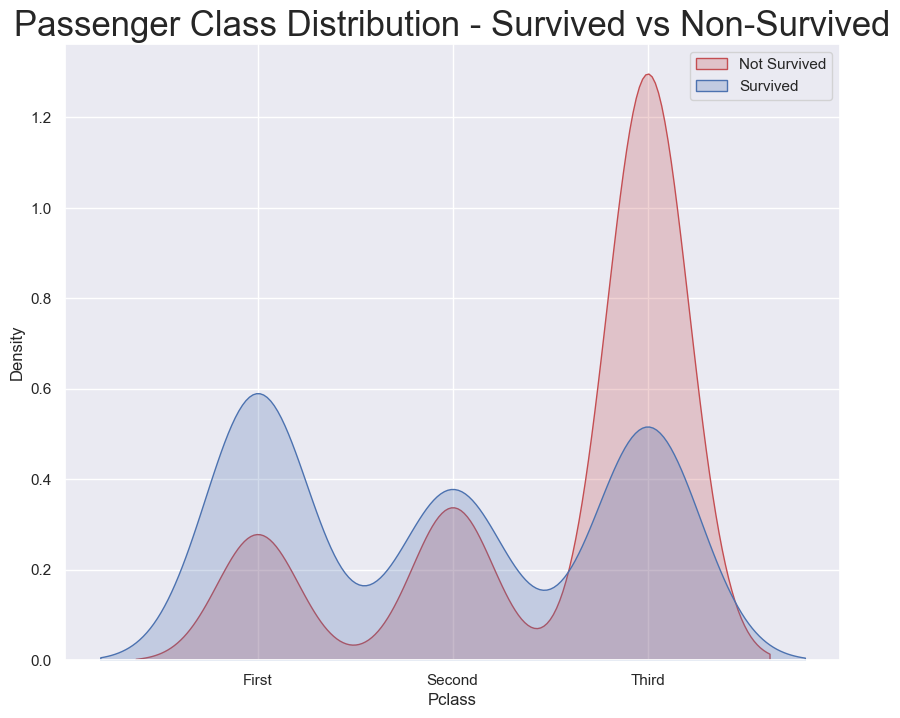

In [22]:
plt.subplots(figsize=(10,8))
ax=sns.kdeplot(train_df.loc[(train_df['Survived'] == 0),'Pclass'],shade=True,color='r',label='Not Survived')
ax.legend()
ax=sns.kdeplot(train_df.loc[(train_df['Survived'] == 1),'Pclass'],shade=True,color='b',label='Survived')
ax.legend()

plt.title("Passenger Class Distribution - Survived vs Non-Survived", fontsize = 25)
labels = ['First', 'Second', 'Third']
plt.xticks(sorted(train_df.Pclass.unique()),labels);

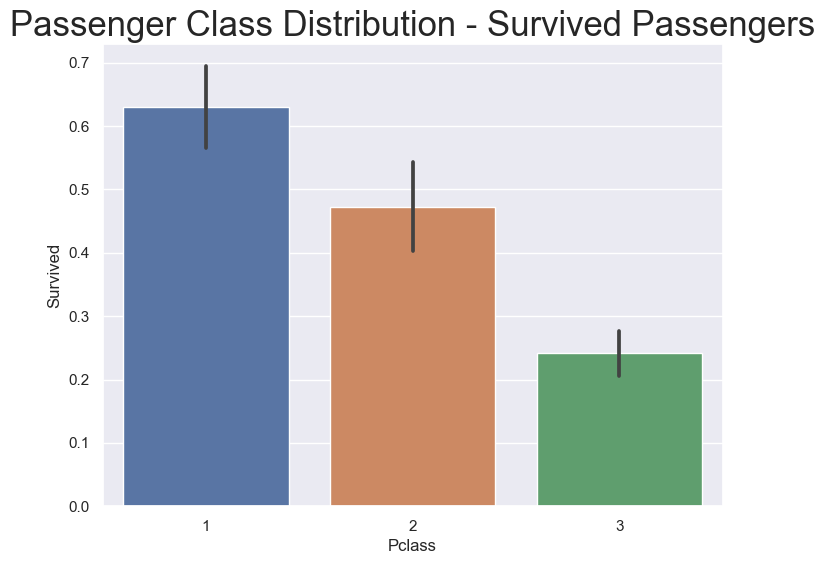

In [23]:
plt.subplots(figsize = (8,6))
sns.barplot(x='Pclass', y='Survived', data=train_df);
plt.title("Passenger Class Distribution - Survived Passengers", fontsize = 25);

The graphs above make it evident that the economic status (Pclass) had a significant impact on the survival chances of Titanic passengers. Passengers in the first class had a notably higher likelihood of surviving compared to those in the third class. Specifically:

- About 63% of first-class passengers survived the Titanic disaster.
- Approximately 48% of second-class passengers survived.
- Only around 24% of third-class passengers survived.

Correlation Matrix and Heatmap


In [24]:
# Look at numeric and categorical values separately 
df_num = train_df[['Age','SibSp','Parch','Fare']]
df_cat = train_df[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

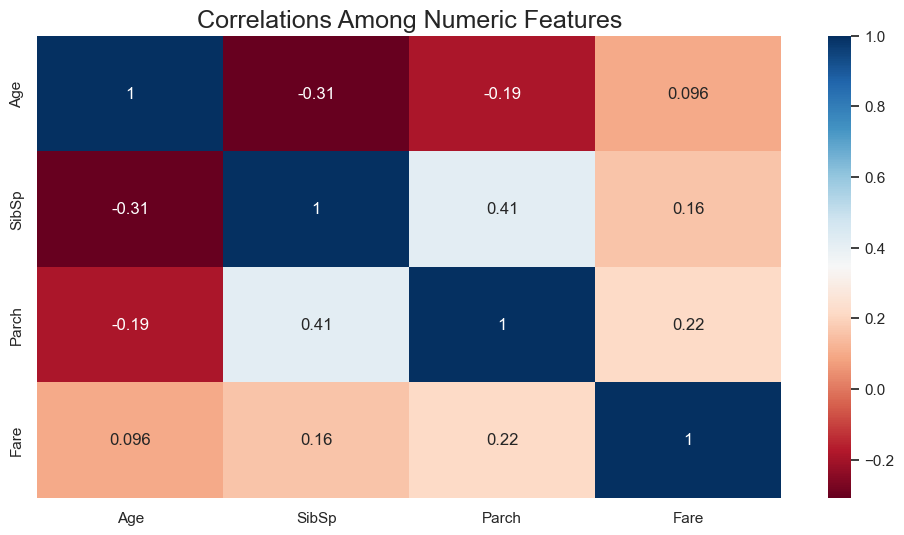

In [25]:
plt.subplots(figsize = (12,6))
sns.heatmap(df_num.corr(), annot=True,cmap="RdBu")
plt.title("Correlations Among Numeric Features", fontsize = 18);

The heatmap shows some interesting observations:

- Parents and siblings often travel together, indicated by the light blue squares.
- Age has a significant negative correlation with the number of siblings.

Regarding Feature Engineering and Data Processing:

Feature Engineering involves using raw data to create new features for predictive modeling. This can include transforming or combining existing features.

I have planned to drop the 'PassengerId' from the training set because it doesn't affect a person's survival probability. However, I'll keep it in the test set as it's needed for submission purposes.

In [26]:
train_df = train_df.drop(['PassengerId'], axis=1)
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


Combining SibSp and Parch
SibSp and Parch would make more sense as a combined feature that shows the total number of relatives a person has on the Titanic. I will create the new feature 'relative' below, and also a value that shows if someone is not alone.

In [27]:
data = [train_df, test_df]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
train_df['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

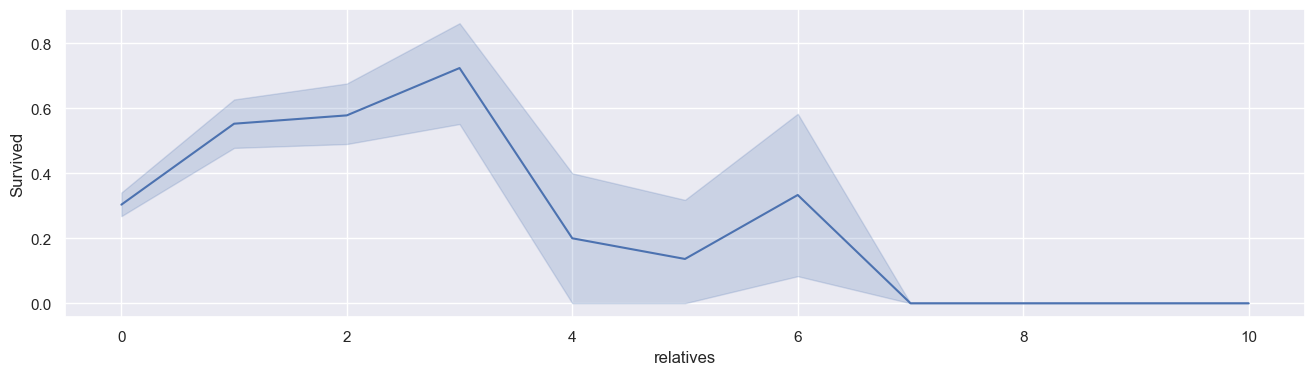

In [28]:
plt.subplots(figsize = (16,4))
ax = sns.lineplot(x='relatives',y='Survived', data=train_df)

Just a reminder, we need to address the missing data in our dataset. We have missing values in three columns: Cabin (687 missing values), Embarked (2 missing values), and Age (177 missing values).

In [29]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [train_df, test_df]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)

In [30]:
# We can now drop the Cabin feature
train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)

Age
As seen previously on "3.1 Dealing with Missing Values", there are a lot of missing 'Age' values (177 data points). We can normalize the 'Age' feature by creating an array that contains random numbers, which are computed based on the mean age value in regards to the standard deviation and is_null.

In [31]:
data = [train_df, test_df]

for dataset in data:
    mean = train_df["Age"].mean()
    std = test_df["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    
    # Compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    
    # Fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_df["Age"].astype(int)

In [32]:
train_df["Age"].isnull().sum()

0

For the 'Embarked' feature, since there are only 2 missing values, we can fill them with the most common value in that column.

In [33]:
train_df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [34]:
common_value = 'S'
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [35]:
train_df['Embarked'].isnull().sum()

0

Converting Features

In [36]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Name        891 non-null    object 
 3   Sex         891 non-null    object 
 4   Age         891 non-null    int32  
 5   SibSp       891 non-null    int64  
 6   Parch       891 non-null    int64  
 7   Ticket      891 non-null    object 
 8   Fare        891 non-null    float64
 9   Embarked    891 non-null    object 
 10  train_test  891 non-null    int64  
 11  relatives   891 non-null    int64  
 12  not_alone   891 non-null    int32  
 13  Deck        891 non-null    int32  
dtypes: float64(1), int32(3), int64(6), object(4)
memory usage: 87.1+ KB


The 'Fare' feature is in float format. Additionally, there are four categorical features: Name, Sex, Ticket, and Embarked.

To work on the 'Fare' feature, I have used the pandas' astype() function to convert it from float64 to int64.

In [37]:
data = [train_df, test_df]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [38]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Survived    891 non-null    int64 
 1   Pclass      891 non-null    int64 
 2   Name        891 non-null    object
 3   Sex         891 non-null    object
 4   Age         891 non-null    int32 
 5   SibSp       891 non-null    int64 
 6   Parch       891 non-null    int64 
 7   Ticket      891 non-null    object
 8   Fare        891 non-null    int32 
 9   Embarked    891 non-null    object
 10  train_test  891 non-null    int64 
 11  relatives   891 non-null    int64 
 12  not_alone   891 non-null    int32 
 13  Deck        891 non-null    int32 
dtypes: int32(4), int64(6), object(4)
memory usage: 83.7+ KB


For the 'Name' feature, I'am planning on feature engineering by extracting titles (like Mr, Miss, Master, and others) from the names of passengers. This will help me to create a new feature called 'Title'. This is a smart approach as titles can provide additional information about the passengers.

In [39]:
data = [train_df, test_df]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Other": 5}

for dataset in data:
    # Extract titles
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.', expand=False)
    
    # Replace titles with a more common title or as Other
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr','Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
    # Convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    
    # Filling NaN with 0 just to be safe
    dataset['Title'] = dataset['Title'].fillna(0)

In [40]:
train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)

In [41]:
# Checking results
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,train_test,relatives,not_alone,Deck,Title
0,0,3,male,22,1,0,A/5 21171,7,S,1,1,0,8,1
1,1,1,female,38,1,0,PC 17599,71,C,1,1,0,3,3
2,1,3,female,26,0,0,STON/O2. 3101282,7,S,1,0,1,8,2
3,1,1,female,35,1,0,113803,53,S,1,1,0,3,3
4,0,3,male,35,0,0,373450,8,S,1,0,1,8,1


Sex
Convert feature 'Sex' into numeric values

male = 0
female = 1

In [42]:
genders = {"male": 0, "female": 1}
data = [train_df, test_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [43]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,train_test,relatives,not_alone,Deck,Title
0,0,3,0,22,1,0,A/5 21171,7,S,1,1,0,8,1
1,1,1,1,38,1,0,PC 17599,71,C,1,1,0,3,3
2,1,3,1,26,0,0,STON/O2. 3101282,7,S,1,0,1,8,2
3,1,1,1,35,1,0,113803,53,S,1,1,0,3,3
4,0,3,0,35,0,0,373450,8,S,1,0,1,8,1


In [44]:
train_df['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

Since the 'Ticket' feature has 681 unique values, converting them into a useful feature could be quite challenging. In light of this, I'm making the decision to drop the 'Ticket' feature from the DataFrame.

In [45]:
train_df = train_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1)

In [46]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,train_test,relatives,not_alone,Deck,Title
0,0,3,0,22,1,0,7,S,1,1,0,8,1
1,1,1,1,38,1,0,71,C,1,1,0,3,3
2,1,3,1,26,0,0,7,S,1,0,1,8,2
3,1,1,1,35,1,0,53,S,1,1,0,3,3
4,0,3,0,35,0,0,8,S,1,0,1,8,1


Convert 'Embarked' feature into numeric values

In [47]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [48]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,train_test,relatives,not_alone,Deck,Title
0,0,3,0,22,1,0,7,0,1,1,0,8,1
1,1,1,1,38,1,0,71,1,1,1,0,3,3
2,1,3,1,26,0,0,7,0,1,0,1,8,2
3,1,1,1,35,1,0,53,0,1,1,0,3,3
4,0,3,0,35,0,0,8,0,1,0,1,8,1


Creating new Categories

In [49]:
data = [train_df, test_df]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

In [50]:
# Checking the distribution
train_df['Age'].value_counts()

4    160
6    158
5    152
3    140
2    122
1     91
0     68
Name: Age, dtype: int64

Fare
For the 'Fare' feature, we need to do the same as with the 'Age' feature. But it isn't that easy, because if we cut the range of the fare values into a few equally big categories, 80% of the values would fall into the first category. Fortunately, we can use pandas "qcut()" function, that we can use to see, how we can form the categories.

In [51]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,train_test,relatives,not_alone,Deck,Title
0,0,3,0,2,1,0,7,0,1,1,0,8,1
1,1,1,1,5,1,0,71,1,1,1,0,3,3
2,1,3,1,3,0,0,7,0,1,0,1,8,2
3,1,1,1,5,1,0,53,0,1,1,0,3,3
4,0,3,0,5,0,0,8,0,1,0,1,8,1


In [52]:
pd.qcut(train_df['Fare'], q=6)

0      (-0.001, 7.0]
1      (52.0, 512.0]
2      (-0.001, 7.0]
3      (52.0, 512.0]
4         (7.0, 8.0]
           ...      
886      (8.0, 14.0]
887     (26.0, 52.0]
888     (14.0, 26.0]
889     (26.0, 52.0]
890    (-0.001, 7.0]
Name: Fare, Length: 891, dtype: category
Categories (6, interval[float64, right]): [(-0.001, 7.0] < (7.0, 8.0] < (8.0, 14.0] < (14.0, 26.0] < (26.0, 52.0] < (52.0, 512.0]]

Using the values from pd.qcut() to create bins for Fare

In [53]:
data = [train_df, test_df]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7) & (dataset['Fare'] <= 8), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 8) & (dataset['Fare'] <= 14), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 14) & (dataset['Fare'] <= 26), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 26) & (dataset['Fare'] <= 52), 'Fare']   = 4
    dataset.loc[dataset['Fare'] > 52, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

In [54]:
# Checking the dataset
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,train_test,relatives,not_alone,Deck,Title
0,0,3,0,2,1,0,0,0,1,1,0,8,1
1,1,1,1,5,1,0,5,1,1,1,0,3,3
2,1,3,1,3,0,0,0,0,1,0,1,8,2
3,1,1,1,5,1,0,5,0,1,1,0,3,3
4,0,3,0,5,0,0,1,0,1,0,1,8,1
5,0,3,0,2,0,0,1,2,1,0,1,8,1
6,0,1,0,6,0,0,4,0,1,0,1,5,1
7,0,3,0,0,3,1,3,0,1,4,0,8,4
8,1,3,1,3,0,2,2,0,1,2,0,8,3
9,1,2,1,1,1,0,4,1,1,1,0,8,3


Model building

In [55]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()

In [56]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)

Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)

# Print score
print(round(acc_sgd,2,), "%")

77.67 %


In [57]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

Y_pred = decision_tree.predict(X_test)

acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

# Print score
print(round(acc_decision_tree,2,), "%")

92.93 %


In [58]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

# Print score
print(round(acc_random_forest,2,), "%")

92.93 %


In [59]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

# Print score
print(round(acc_log,2,), "%")

81.71 %


In [60]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)

Y_pred = knn.predict(X_test)

acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

# Print score
print(round(acc_knn,2,), "%")

86.76 %


In [61]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)

Y_pred = gaussian.predict(X_test)

acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

# Print score
print(round(acc_gaussian,2,), "%")

78.56 %


In [62]:
perceptron = Perceptron(max_iter=1000)
perceptron.fit(X_train, Y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)

# Print score
print(round(acc_perceptron,2,), "%")

70.26 %


Model evaluation
Which one is the best model?

In [63]:
results = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
92.93,Random Forest
92.93,Decision Tree
86.76,KNN
81.71,Logistic Regression
78.56,Naive Bayes
77.67,Stochastic Gradient Decent
70.26,Perceptron


The Machine Learning models are arranged in the following order: Random Forest classifier on top, followed by Decision Tree, and then K-Nearest Neighbors (KNN). Now, the focus is on evaluating how well the Random Forest model performs, and this will be done using cross-validation.

K-Fold Cross Validation is a technique where the training data is split into K subsets (also known as folds). If we consider an example with 4 folds (K = 4), the Random Forest model is trained and validated 4 times. Each time, a different fold is used for validation, while the model is trained on the other 3 folds.

The image below illustrates this process using 4 folds (K = 4). Each row represents one training and validation cycle. In the first row, the model is trained on the second, third, and fourth subsets and validated on the first subset. In the second row, the model is trained on the first, third, and fourth subsets and validated on the second subset. This cycle continues until each fold has been used for validation exactly once.

In [64]:
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")

In [65]:
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.78888889 0.84269663 0.75280899 0.86516854 0.84269663 0.80898876
 0.80898876 0.7752809  0.85393258 0.82022472]
Mean: 0.8159675405742822
Standard Deviation: 0.03432806468347261


This representation seems to provide a more realistic perspective. The Random Forest classifier model exhibits an average accuracy of 81%, accompanied by a standard deviation of 3.9%. This standard deviation indicates the precision of the estimates.

In simpler terms, the model's accuracy might vary by around ± 3.9%. The accuracy seems promising, and given that Random Forest is user-friendly, the intention is to enhance its performance even more in the upcoming section.

In [66]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

In [67]:
importances.head(12)

,importance
feature,
Title,0.205
Sex,0.169
Age,0.153
Fare,0.109
Pclass,0.093
Deck,0.086
relatives,0.062
Embarked,0.048
SibSp,0.038


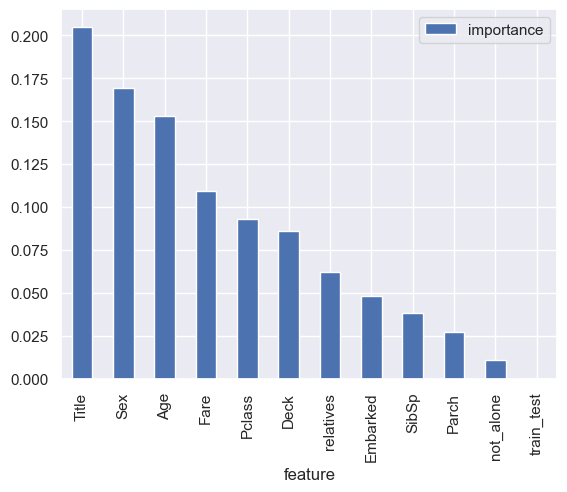

In [68]:
importances.plot.bar();

The analysis suggests that 'not_alone' and 'Parch' don't have a substantial impact on the prediction process of the Random Forest classifier. Consequently, I will remove these features from the DataFrame and retrain the classifier. While there's potential to eliminate more features, doing so would necessitate further investigation into their effects on the model. For the present, I'll solely remove 'not_alone' and 'Parch' from the DataFrame.

In [69]:
# Dropping not_alone
train_df  = train_df.drop("not_alone", axis=1)
test_df  = test_df.drop("not_alone", axis=1)

# Dropping Parch
train_df  = train_df.drop("Parch", axis=1)
test_df  = test_df.drop("Parch", axis=1)

In [70]:
# # Reassigning features
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()

Training the Random Forest classifier once again

In [71]:
random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

# Print scores
print(round(acc_random_forest,2,), "%")

92.93 %


Feature importance without 'not_alone' and 'Parch' features

In [72]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

In [73]:
importances.head(12)

,importance
feature,
Title,0.224
Sex,0.170
Age,0.148
Fare,0.105
Pclass,0.089
Deck,0.085
relatives,0.081
SibSp,0.051
Embarked,0.047


The Random Forest model continues to exhibit similar prediction performance as before. Typically, having too many features can lead to overfitting, and having fewer features can help avoid this issue. However, based on our current dataset, the number of features seems appropriate.

Additionally, there's an alternative method to validate the Random Forest classifier, which is equally accurate as the previous scoring method. This method involves using something called the Out of Bag (OOB) score to estimate the model's generalization accuracy. Essentially, the OOB score is calculated by determining how many correctly predicted rows come from the out-of-the-bag sample.

In [74]:
print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 81.47999999999999 %
